In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [327]:
df_train = pd.read_csv("sign_mnist_train.csv")
df_test = pd.read_csv("sign_mnist_test.csv")

In [328]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [329]:
# https://stackoverflow.com/questions/41624241/pandas-split-dataframe-into-two-dataframes
df_train_targets = df_train.iloc[:, 0]
df_train_images = df_train.iloc[:, 1:]
df_test_targets = df_test.iloc[:, 0]
df_test_images = df_test.iloc[:, 1:]

In [330]:
df_train_images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [331]:
X_train = df_train_images.values
y_train = df_train_targets.values
X_test = df_test_images.values
y_test = df_test_targets.values
# print(y_train.shape)

In [332]:
# shifts labels because of the missing J in the alphabet (value 9)
for i in range(np.shape(y_train)[0]):
    if (y_train[i] > 9):
        y_train[i] -= 1
        
for i in range(np.shape(y_test)[0]):
    if (y_test[i] > 9):
        y_test[i] -= 1

In [333]:
# https://codereview.stackexchange.com/questions/183658/replacing-letters-with-numbers-with-its-position-in-alphabet
# https://docs.python.org/2/library/string.html
from string import ascii_uppercase
alphabet = "ABCDEFGHIKLMNOPQRSTUVWXY"

# function to convert 0-23 number to A-Z character (minus J and Z)
def to_char(num, char = None):
    char = alphabet[num]
    return char

y_train_char = np.empty((y_train.shape[0], ), dtype = np.str)
for i in range(y_train.shape[0]):
    y_train_char[i] = to_char(y_train[i])
print(y_train_char)

y_test_char = np.empty((y_test.shape[0], ), dtype = np.str)
for i in range(y_test.shape[0]):
    y_test_char[i] = to_char(y_test[i])
print(y_test_char)


['D' 'G' 'C' ... 'S' 'R' 'X']
['G' 'F' 'K' ... 'C' 'E' 'C']


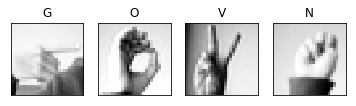

In [336]:
# From demo "demo_mnist_svm" with modifications
def plt_digit(x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    
Iperm = np.random.permutation(X_test[0])
    
for i in range(4):
    ind = Iperm[i]
    plt.subplot(1,4,i+1)
    plt_digit(X_test[ind,:])
    plt.title(y_test_char[ind])

In [23]:
# Normalize data (From SVM MNIST demo)
X_train = X_train/255.0*2 - 1 # convert to range [-1,1]
X_test = X_test/255.0*2 - 1 # convert to range [-1,1]

In [143]:
import sklearn
from sklearn import datasets, linear_model, preprocessing
logreg = linear_model.LogisticRegression(verbose=1, multi_class='multinomial', 
                                         solver='lbfgs', max_iter=500)
logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [144]:
yhat_logreg = logreg.predict(X_test)
acc_logreg = np.mean(yhat_logreg == y_test)
print('Accuracy = {0:f}'.format(acc_logreg))
# Accuracy before normalization = 0.674986
# Accuracy after normalization  = 0.686977

Accuracy = 0.686977


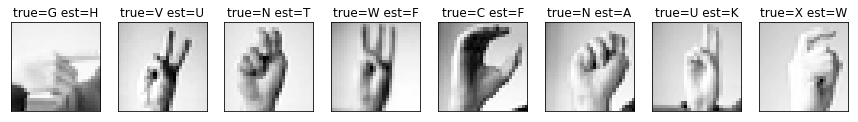

In [145]:
nplt = 8
Ierr = np.where(y_test != yhat_logreg)[0]

Iperm = np.random.permutation(Ierr)

plt.figure(figsize=(15, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Iperm[i]    
    plt_digit(X_test[ind,:]) 
    title = "true=" + to_char(y_test[ind]) + " est=" + to_char(yhat_logreg[ind])
    plt.title(title)

In [148]:
from sklearn import svm
# Create a classifier: a support vector classifier with linear kernel
svc = svm.SVC(probability=False, kernel="linear", verbose=1)

svc.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1)

In [149]:
yhat_svc_linear = svc.predict(X_test)
acc_svc_linear = np.mean(yhat_svc_linear == y_test)
print('Accuracy = {0:f}'.format(acc_svc_linear))
# Accuracy before normalization = 0.781651
# Accuracy after normalization  = 0.781651

Accuracy = 0.781651


In [17]:
X_train_subset = X_train[0:10000]
y_train_subset = y_train[0:10000]

In [34]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# usually a range of 10^-3 to 10^3 is sufficient according to source above, so we will do 10^-4 and 10^4
#C_range = np.logspace(2, 18, 9)
#gamma_range = np.logspace(-13, -5, 9)
C_range = np.logspace(0,5,6)
gamma_range = np.logspace(-5, -10, 6)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(kernel="rbf"), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 1e-07} with a score of 1.00


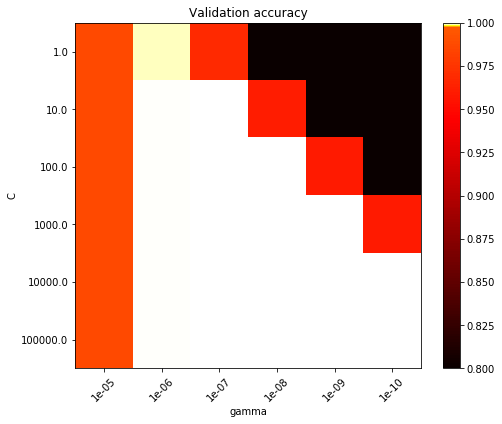

In [36]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# https://matplotlib.org/tutorials/colors/colormaps.html
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.8, midpoint=0.9975))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [37]:
print(scores)

[[0.98710617 0.99967219 0.96860317 0.70198507 0.21114551 0.04716809]
 [0.98728829 0.99996358 1.         0.96106356 0.70238572 0.21158259]
 [0.98728829 0.99996358 1.         1.         0.95938809 0.70202149]
 [0.98728829 0.99996358 1.         1.         1.         0.95906028]
 [0.98728829 0.99996358 1.         1.         1.         1.        ]
 [0.98728829 0.99996358 1.         1.         1.         1.        ]]


In [ ]:
# Create a classifier: a support vector classifier with RBF kernel
svcrbf = svm.SVC(probability=False, kernel="rbf", C=100, gamma=1e-7, verbose=1)
svcrbf.fit(X_train,y_train)

[LibSVM]

In [39]:
yhat_svc_rbf = svcrbf.predict(X_test)
acc_svc_rbf = np.mean(yhat_svc_rbf == y_test)
print('Accuracy = {0:f}'.format(acc_svc_rbf))
# Accuracy before normalization = 0.815254
# Accuracy after normalization  = 0.781651

Accuracy = 0.815254


In [79]:
# Basic Neural Network from MNIST Neural Network Demo

import torch
import torch.utils.data

batch_size = 240

# Convert the numpy arrays to PyTorch tensors
Xtr_torch = torch.Tensor(X_train)
ytr_torch = torch.Tensor(y_train)
Xts_torch = torch.Tensor(X_test)
yts_torch = torch.Tensor(y_test)

# Create a training Dataset
train_ds = torch.utils.data.TensorDataset(Xtr_torch, ytr_torch)
# Creates a training DataLoader from this Dataset
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True) 

# Create a testing Dataset
test_ds = torch.utils.data.TensorDataset(Xts_torch, yts_torch)
# Creates a testing DataLoader from this Dataset
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size)

In [80]:
import torch.nn as nn

nin = X_train.shape[1] # dimension of input data
nh = 240 # number of hidden units
nout = int(np.max(y_train)+1) # number of outputs = 10 since there are 10 classes

class Net(nn.Module):
    def __init__(self,nin,nh,nout):
        super(Net,self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.Dense1 = nn.Linear(nin,nh)
        self.Dense2 = nn.Linear(nh,nout)
        
    def forward(self,x):
        x = self.sigmoid(self.Dense1(x))
        out = self.Dense2(x)
        return out

model = Net(nin=nin, nh=nh, nout=nout)

In [81]:
import torch.optim as optim

# if lr = .001 too high
# if lr = .0001 then accuracy 62.69 after 50 epochs
# if lr = .000075 then accuracy 67.5 after 50 epochs
# if lr = .00005 then accuracy 70.69 after 50 epochs
# if lr = .0000375 then accuracy 67.44 after 50 epochs
# if lr = .000025 then accuracy 69.3 after 50 epochs
# if lr = .00001 then accuracy 59.98 after 50 epochs
opt = optim.Adam(model.parameters(), lr= 0.00005)

criterion = nn.CrossEntropyLoss()

In [82]:
num_epoch = 100

a_tr_loss = np.zeros([num_epoch])
a_tr_accuracy = np.zeros([num_epoch])
a_ts_loss = np.zeros([num_epoch])
a_ts_accuracy = np.zeros([num_epoch])

for epoch in range(num_epoch):

    model.train() # put model in training mode
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    batch_loss = []
    # iterate over training set
    for train_iter, data in enumerate(train_loader):
        x_batch,y_batch = data
        y_batch = y_batch.type(torch.long)
        out = model(x_batch)
        # Compute Loss
        loss = criterion(out,y_batch)
        batch_loss.append(loss.item())
        # Compute gradients using back propagation
        opt.zero_grad()
        loss.backward()
        # Take an optimization 'step'
        opt.step()
        # Do hard classification: index of largest score
        _, predicted = torch.max(out.data, 1)
        # Compute number of decision errors
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        
    tr_accuracy = 100*correct/total # Compute accuracy over epoch
    a_tr_loss[epoch] = np.mean(batch_loss) # Compute average loss over epoch
    a_tr_accuracy[epoch] = 100*correct/total

    model.eval() # put model in evaluation mode
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    batch_loss = []
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            labels = labels.type(torch.long)
            outputs = model(images)
            batch_loss.append(criterion(outputs,labels).item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    a_ts_loss[epoch] = np.mean(batch_loss)
    a_ts_accuracy[epoch] = 100*correct/total
    # Print details every print_mod epoch
    print('Epoch: {0:2d}   Train Loss: {1:.3f}   '.format(epoch+1, a_tr_loss[epoch])
          +'Train Accuracy: {0:.2f}    Test Loss: {1:.3f}   '.format(a_tr_accuracy[epoch], a_ts_loss[epoch])
          +'Test Accuracy: {0:.2f}'.format(a_ts_accuracy[epoch]))
        

Epoch:  1   Train Loss: 3.110   Train Accuracy: 11.23    Test Loss: 3.072   Test Accuracy: 14.88
Epoch:  2   Train Loss: 2.974   Train Accuracy: 24.48    Test Loss: 2.962   Test Accuracy: 22.48
Epoch:  3   Train Loss: 2.843   Train Accuracy: 33.65    Test Loss: 2.838   Test Accuracy: 29.31
Epoch:  4   Train Loss: 2.708   Train Accuracy: 41.73    Test Loss: 2.727   Test Accuracy: 35.76
Epoch:  5   Train Loss: 2.577   Train Accuracy: 48.69    Test Loss: 2.620   Test Accuracy: 38.94
Epoch:  6   Train Loss: 2.456   Train Accuracy: 53.76    Test Loss: 2.536   Test Accuracy: 38.75
Epoch:  7   Train Loss: 2.335   Train Accuracy: 57.53    Test Loss: 2.427   Test Accuracy: 43.24
Epoch:  8   Train Loss: 2.223   Train Accuracy: 61.37    Test Loss: 2.339   Test Accuracy: 46.22
Epoch:  9   Train Loss: 2.116   Train Accuracy: 64.41    Test Loss: 2.252   Test Accuracy: 48.93
Epoch: 10   Train Loss: 2.019   Train Accuracy: 66.53    Test Loss: 2.178   Test Accuracy: 48.44
Epoch: 11   Train Loss: 1.926 

Epoch: 86   Train Loss: 0.106   Train Accuracy: 99.59    Test Loss: 0.994   Test Accuracy: 71.32
Epoch: 87   Train Loss: 0.101   Train Accuracy: 99.62    Test Loss: 1.007   Test Accuracy: 71.24
Epoch: 88   Train Loss: 0.098   Train Accuracy: 99.64    Test Loss: 0.995   Test Accuracy: 70.65
Epoch: 89   Train Loss: 0.095   Train Accuracy: 99.66    Test Loss: 0.991   Test Accuracy: 71.67
Epoch: 90   Train Loss: 0.091   Train Accuracy: 99.67    Test Loss: 0.993   Test Accuracy: 70.54
Epoch: 91   Train Loss: 0.088   Train Accuracy: 99.66    Test Loss: 0.994   Test Accuracy: 71.35
Epoch: 92   Train Loss: 0.085   Train Accuracy: 99.68    Test Loss: 0.989   Test Accuracy: 71.19
Epoch: 93   Train Loss: 0.082   Train Accuracy: 99.69    Test Loss: 0.994   Test Accuracy: 71.83
Epoch: 94   Train Loss: 0.079   Train Accuracy: 99.70    Test Loss: 0.983   Test Accuracy: 71.88
Epoch: 95   Train Loss: 0.077   Train Accuracy: 99.73    Test Loss: 0.983   Test Accuracy: 70.87
Epoch: 96   Train Loss: 0.074 

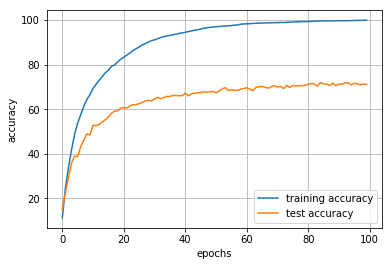

In [83]:
plt.plot(a_tr_accuracy)
plt.plot(a_ts_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'test accuracy'])

In [342]:
X_train = df_train_images.values
y_train = df_train_targets.values
X_test = df_test_images.values
y_test = df_test_targets.values

# shifts labels because of the missing J in the alphabet (value 9)
for i in range(np.shape(y_train)[0]):
    if (y_train[i] > 9):
        y_train[i] -= 1
        
for i in range(np.shape(y_test)[0]):
    if (y_test[i] > 9):
        y_test[i] -= 1

# Normalize data from [-1, 1]
X_train = (X_train/255)*2 - 1
X_test = (X_test/255)*2 - 1

nrow = 28
ncol = 28

Xtr_box = np.zeros((X_train.shape[0],nrow,ncol))
for i in range(np.shape(X_train)[0]):
    Xtr_box[i] = X_train[i].reshape((nrow,ncol))

Xts_box =  np.zeros((X_test.shape[0],nrow,ncol))
for i in range(np.shape(X_test)[0]):
    Xts_box[i] = X_test[i].reshape((nrow,ncol))

(7172, 28, 28)
9


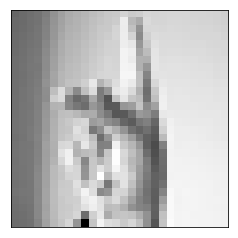

In [343]:
print(Xts_box.shape)
plt.imshow(Xts_box[2],  cmap='Greys_r')
plt.xticks([])
plt.yticks([])
print(y_test[2])

In [344]:
nchan_in = 1       # number of input channels = 1 since it is a greyscale image
reshape_tr = (Xtr_box.shape[0],nchan_in,nrow,ncol)
reshape_ts = (Xts_box.shape[0],nchan_in,nrow,ncol)

Xtr = Xtr_box.reshape(reshape_tr)
Xts = Xts_box.reshape(reshape_ts)

In [345]:
print(Xts.shape)

(7172, 1, 28, 28)


In [352]:
# https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/

import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim

batch_size = 64

# Convert the numpy arrays to PyTorch tensors
Xtr_torch = torch.Tensor(Xtr)
ytr_torch = torch.Tensor(y_train)
Xts_torch = torch.Tensor(Xts)
yts_torch = torch.Tensor(y_test)

# Create a training Dataset
train_ds = torch.utils.data.TensorDataset(Xtr_torch, ytr_torch)
# Creates a training DataLoader from this Dataset
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True) 

# Create a testing Dataset
test_ds = torch.utils.data.TensorDataset(Xts_torch, yts_torch)
# Creates a testing DataLoader from this Dataset
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size)

In [358]:
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        
        self.conv1 = nn.Conv2d(1,16,3,padding=1)
        # outputs 16 channels of 14x14
        
        self.conv2 = nn.Conv2d(16,16,3,padding=1)
        # outputs 16 channels of 7x7
        
        self.fc1 = nn.Linear(16*7*7, 392) #392 is 784/2
        self.fc2 = nn.Linear(392, num_classes)
        
    def forward(self,x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0),-1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BasicCNN()

In [359]:
# num_classes = np.max(y_train)+1

# class ConvNet(nn.Module):
#     def __init__(self):
#         super(ConvNet, self).__init__()
#         self.relu = nn.ReLU()
#         self.layer1 = nn.Sequential(
#             nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2))
#         self.layer2 = nn.Sequential(
#             nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2))
#         self.drop_out = nn.Dropout()
#         self.fc1 = nn.Linear(7 * 7 * 64, 1000)
#         self.fc2 = nn.Linear(1000, num_classes)
        
#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = out.reshape(out.size(0), -1)
#         out = self.drop_out(out)
#         out = self.relu(self.fc1(out))
#         out = self.fc2(out)
#         return out
    
# model = ConvNet()

In [360]:
# picked learning rate based on last NN, but could be different
epochs = 20
lrate = .01
decay = lrate/epochs

In [361]:
# initiate Adam optimizer
opt = optim.Adam(model.parameters(), lr=lrate)

# Create learning rate scheduler
lambda1 = lambda epoch: lrate - decay*epoch
scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=lambda1)

# initiate loss function
criterion = nn.CrossEntropyLoss()

print(str(model))

BasicCNN(
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=24, bias=True)
)


In [ ]:
basic_tr_accuracy = []
basic_ts_accuracy = []

for epoch in range(epochs):
    # Take scheduler step
    scheduler.step()
    
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    model.train() # put model in training mode
    # iterate over training set
    for train_iter, data in enumerate(train_loader):
        x_batch,y_batch = data
        y_batch = y_batch.type(torch.long)
        out = model(x_batch)
        # Compute Loss
        loss = criterion(out,y_batch)
        # Zero gradients
        opt.zero_grad()
        # Compute gradients using back propagation
        loss.backward()
        # Take an optimization 'step'
        opt.step()
        
        # Compute Accuracy
        _, predicted = torch.max(out.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        

    basic_tr_accuracy.append( 100*correct/total )
    
    correct = 0
    total = 0
    model.eval() # put model in evaluation mode
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            labels = labels.type(torch.long)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    basic_ts_accuracy.append( 100*correct/total )
    
    # Print details every print_mod epoch
    print('Epoch: {0:2d}   Train Accuracy: {1:.3f}%   Test Accuracy: {2:.3f}%'.format(epoch+1, basic_tr_accuracy[epoch], basic_ts_accuracy[epoch]))
        

print('Done!')

Epoch:  1   Train Accuracy: 28.119%   Test Accuracy: 48.717%


tensor([ 6.,  5.,  9.,  0.,  3., 19.,  9., 12.,  3.,  7.,  8.,  8., 19., 10.,
         7.,  4., 20.,  0.,  7.,  7.,  2.,  0., 19.,  4.,  9., 13.,  2., 13.,
         7.,  1.,  7.,  8., 11., 17.,  3., 19., 11.,  3., 16., 12., 13., 21.,
         8., 13., 12.,  5., 15.,  4., 17., 11., 18., 20., 18.,  5., 14., 14.,
        19.,  4.,  7., 20.,  9., 11.,  9., 20.])


([], <a list of 0 Text yticklabel objects>)

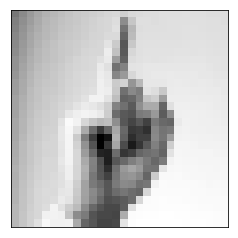

In [316]:
class BNNet(nn.Module):
    def __init__(self):
        super(BNNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(1,16,3,padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16,16,3,padding=1)
        self.bn2 = nn.BatchNorm1d(16*7**2)
        self.fc1 = nn.Linear(16*7**2, 392)
        self.bn3 = nn.BatchNorm1d(392)
        self.fc2 = nn.Linear(392, num_classes)
        
    def forward(self,x):
        x = self.bn1(self.pool(self.relu(self.conv1(x))))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.bn2(x.view(x.size(0),-1))
        x = self.bn3(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


model = BNNet()


# initiate Adam optimizer
opt = optim.Adam(model.parameters(), lr=lrate)

# Create learning rate scheduler
lambda1 = lambda epoch: lrate - decay*epoch
scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=lambda1)

# initiate loss function
criterion = nn.CrossEntropyLoss()

print(str(model))